# Identification of molecular families overrepresented in metabolites correlating with gestational age using hypergeometric testing

load libraries

In [1]:
import sys
import csv
sys.path.append('git/molnet/code/') 
sys.path.append('git/pymzm/') 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from mnet_utilities import initialise_from_gnps
mol_families,cluster_dict,spectra,peak_areas, file_list = initialise_from_gnps(
    '../GNPS_output_graphML/',
    '../featuretable_blankfiltered.tsv')

Loading spectra from ../GNPS_output_graphML/spectra/specs_ms.mgf
Loaded 100 spectra
Loaded 200 spectra
Loaded 300 spectra
Loaded 400 spectra
Loaded 500 spectra
Loaded 600 spectra
Loaded 700 spectra
Loaded 800 spectra
Loaded 900 spectra
Loaded 1000 spectra
Loaded 1100 spectra
Loaded 1200 spectra
Loaded 1300 spectra
Loaded 1400 spectra
Loaded 1500 spectra
Loaded 1600 spectra
Loaded 1700 spectra
Loaded 1800 spectra
Loaded 1900 spectra
Loaded 2000 spectra
Loaded 2100 spectra
Loaded 2200 spectra
Loaded 2300 spectra
Loaded 2400 spectra
Loaded 2500 spectra
Loaded 2600 spectra
Loaded 2700 spectra
Loaded 2800 spectra
Loaded 2900 spectra
Loaded 3000 spectra
Loaded 3100 spectra
Loaded 3200 spectra
Loaded 3300 spectra
Loaded 3400 spectra
Loaded 3500 spectra
Loaded 3600 spectra
Loaded 3700 spectra
Loaded 3800 spectra
Loaded 3900 spectra
Loaded 4000 spectra
Loaded 4100 spectra
Loaded 4200 spectra
Loaded 4300 spectra
Loaded 4400 spectra
Loaded 4500 spectra
Loaded 4600 spectra
Loaded 4700 spectra
Load

In [4]:
len(file_list)

148

`peak_areas` is a dictionary with the <i>cluster id</i> as a key and a dictionary as the value with <i>m/z</i>, <i>rt</i>, <i>cluster id</i> and peak areas fields. 

Molecular family object containing 3 clusters
Cluster (1), mz: 424.9551, (None) <- 0.9156 -> Cluster (1), mz: 406.9445, (None)
Cluster (1), mz: 424.9551, (None) <- 0.8329 -> Cluster (1), mz: 425.1877, (None)
Cluster (1), mz: 406.9445, (None) <- 0.7445 -> Cluster (1), mz: 425.1877, (None)


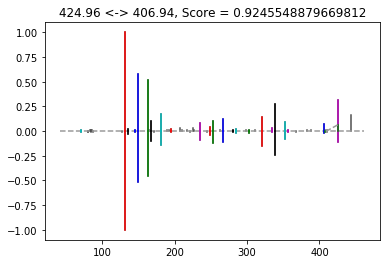

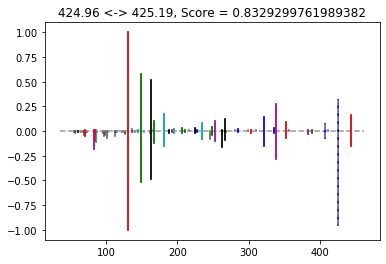

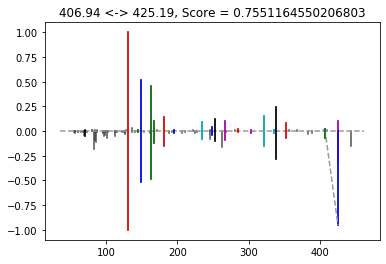

In [5]:
from scoring_functions import fast_cosine_shift
import pylab as plt
%matplotlib inline
mol_families[0].report(fast_cosine_shift,0.2)

## Univariate correlation at the individual metabolite level using Kendall's Tau

load libraries

In [6]:
import csv
import numpy as np
from mnet_utilities import family_hg

load metadata

In [7]:
corrmeta = {}
with open('../metadata.tsv','r') as f:
    reader = csv.reader(f,delimiter = '\t')
    heads = next(f)
    for line in reader:
        try:
            corrmeta[line[0]] = int(line[2].rstrip())
        except ValueError:
            corrmeta[line[0]] = line[2].rstrip()

TIC normalize peak areas

In [8]:
from mzmine import peakareas2numpy
pa_array,pa_array_tic,cluster_idx,file_idx = peakareas2numpy(peak_areas,tic_normalise = True)

Put the metadata into a vector in the correct order

In [9]:
ga_vals = np.zeros(len(file_idx))
for f,pos in file_idx.items():
    ga_vals[pos] = corrmeta[f]

Do the correlation using Kendall's Tau

In [10]:
from scipy.stats import kendalltau as corrfun
corrp = {}
for c in cluster_idx:
    cpos = cluster_idx[c]
    rho,p = corrfun(ga_vals,pa_array_tic[cpos,:])
    if np.isnan(p):
        p = 1
    corrp[c] = {'pval':p,'effect' :rho}

Load Kendall's Tau results calculated in R

In [11]:
corrp_mad = {}
n_lines = 0
with open('../Prematurity_SupplementaryMaterial/CorrelationAnalysis/KendallsTauCorrelation_GA.txt','r') as f:
    reader = csv.reader(f,delimiter = '\t')
    heads = next(reader)
    print(heads)
    for line in reader:
        corrp_mad[int(line[3])] = {'pval':float(line[1]),'effect':float(line[0])}
        n_lines += 1

['estimate.cor', 'p.value', 'p.value.corrected', 'cluster id']


Perform hypergeometric testing using the non-FDR corrected p-values and compare molecular families retrieved by R and Python

In [12]:
fam_clust_sig_hyp = family_hg(corrp,mol_families,p_thresh = 0.01)
fam_clust_sig_hyp_mad = family_hg(corrp_mad,mol_families,p_thresh = 0.01)

In [13]:
for i in range(20):
    fam,hyp,n_clu,n_sig = fam_clust_sig_hyp[i]
    print(fam.family_id,hyp,n_clu,n_sig)

223 4.0509105672205334e-07 15 11
121 1.481684786414268e-05 56 21
693 5.151010668766177e-05 12 8
472 0.00024244398252015154 11 7
939 0.0003227959753778823 6 5
1138 0.0003227959753778823 6 5
1096 0.0004262111317570146 4 4
1112 0.0004262111317570146 4 4
1492 0.0004262111317570146 4 4
36 0.000499966566042123 26 11
217 0.0014636638278525949 21 9
12 0.0017309271398607317 47 15
306 0.0029707112293756305 3 3
316 0.0029707112293756305 3 3
439 0.0029707112293756305 3 3
1261 0.0029707112293756305 3 3
1303 0.0029707112293756305 3 3
465 0.010604211522470439 4 3
824 0.010604211522470439 4 3
175 0.018468733031239963 39 11


In [14]:
for i in range(20):
    fam,hyp,n_clu,n_sig = fam_clust_sig_hyp_mad[i]
    print(fam.family_id,hyp,n_clu,n_sig)

223 4.0509105672205334e-07 15 11
121 1.481684786414268e-05 56 21
693 5.151010668766177e-05 12 8
472 0.00024244398252015154 11 7
939 0.0003227959753778823 6 5
1138 0.0003227959753778823 6 5
1096 0.0004262111317570146 4 4
1112 0.0004262111317570146 4 4
1492 0.0004262111317570146 4 4
36 0.000499966566042123 26 11
217 0.0014636638278525949 21 9
12 0.0017309271398607317 47 15
306 0.0029707112293756305 3 3
316 0.0029707112293756305 3 3
439 0.0029707112293756305 3 3
1261 0.0029707112293756305 3 3
1303 0.0029707112293756305 3 3
465 0.010604211522470439 4 3
824 0.010604211522470439 4 3
175 0.018468733031239963 39 11


show component index of significant families

In [15]:
sg_mf = list(filter(lambda x: x[1] <= 0.01,fam_clust_sig_hyp_mad))
sg_mf_id,_,_,_ = zip(*sg_mf)

In [16]:
sgmfids = [item[0] for item in sg_mf]
sgmfids2 =[o.family_id for o in sgmfids] 

In [17]:
len(sgmfids2)

17

In [18]:
sgmfids2.sort()

In [19]:
sgmfids2

[12,
 36,
 121,
 217,
 223,
 306,
 316,
 439,
 472,
 693,
 939,
 1096,
 1112,
 1138,
 1261,
 1303,
 1492]

get cluster index of all nodes within significant families

In [20]:
sigclids = []
sigcompids = []
for i in sgmfids: 
    cls = i.clusters
    for j in cls:
        sigclids.append(j.cluster_id)
        sigcompids.append(i.family_id)

In [21]:
len(sigclids)

230

In [22]:
len(sigcompids)

230

write cluster indexes of all nodes within significant families to file for import into Cytoscape

In [23]:
import pandas as pd

In [24]:
sig_fams_001 = pd.DataFrame(
    {'componentindex_HG_001': sigcompids,
     'clusterindex_HG_001': sigclids,
    })

In [25]:
sig_fams_001.head(6)

,componentindex_HG_001,clusterindex_HG_001
0,223,23219
1,223,24727
2,223,23153
3,223,22556
4,223,29807
5,223,23367


In [26]:
sig_fams_001.to_csv('SignificantFamilies_001.tsv', sep = '\t', index = False)